Load regression data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

housing = fetch_california_housing()
print(housing.feature_names)
print(housing.target_names)

X = housing.data
y = housing.target



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


X, at this point, is a numpy matrix (just numbers)

In [24]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


The reason why Califronia X data is a numpy matrix, with no column names, is because the California dataset is inside the scikit-learn library, already prepared for use. However, in more real situations (like the assignment), we read the data from a file into a Pandas dataframe. In that case, columns would have names and values may not be numeric. In order to simulate a real situation more closely, we are going to put the names of the columns by hand (notice that if data is read from a file into a Pandas dataframe, as you do in the assignments, you don't have to do this)!!!

In [3]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = housing.feature_names

Now, X is a dataframe with column names

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=42)

Define pipeline for KNN (with scaling)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
knn = KNeighborsRegressor()

pipe_scale_knn = Pipeline([
 ('scale', scaler),
 ('knn', knn)
])

This pipe that we have created would allow us to continue estimating the model as usual. For instance with hold out only and not hyperparameter tunning:

In [7]:
pipe_scale_knn.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsRegressor())])

In [25]:
from sklearn.metrics import mean_squared_error

predictions_test_scaled_knn = pipe_scale_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions_test_scaled_knn))

0.6638490078957968

In this particular case we do not have so mnay features, but still we may one to see how feature selection works, specifying the 3 most important features, and select them according to the f_regression criterion.

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

scaler = StandardScaler()
selector = SelectKBest(f_regression, k=3)
knn = KNeighborsRegressor()

pipe_select_scale_knn = Pipeline([
 ('scale', scaler),
 ('select', selector),
 ('knn', knn)])

The model is trained now

In [10]:
pipe_select_scale_knn.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('select',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x795893b06440>)),
                ('knn', KNeighborsRegressor())])

We can even check which features were selected.

In [11]:
pipe_select_scale_knn.named_steps

{'scale': StandardScaler(),
 'select': SelectKBest(k=3, score_func=<function f_regression at 0x795893b06440>),
 'knn': KNeighborsRegressor()}

In [12]:
import numpy as np
print(f"Features selected: {pipe_select_scale_knn.named_steps['select'].get_support()}")

print(f"Locations where features selected: {np.where(pipe_select_scale_knn.named_steps['select'].get_support())}")

feature_names_before_selection = pipe_select_scale_knn.named_steps['scale'].get_feature_names_out()
print(f"In Scikit-learn 1.x, we can even get the feature names after selection: {pipe_select_scale_knn.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")



Features selected: [ True False  True False False False  True False]
Locations where features selected: (array([0, 2, 6]),)
In Scikit-learn 1.x, we can even get the feature names after selection: ['MedInc' 'AveRooms' 'Latitude']


We can evaluate the model with the selected features on the testing partition:

In [13]:
from sklearn.metrics import mean_squared_error

predictions_test = pipe_select_scale_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions_test))

0.79521419292351

QUESTION: Which method performs better, the one with feature selection or the one without?

We have treated Feature Selection as a step of the preprocessing pipe. But the number of features selected could be treated as a parameter to tune as well. Let's select the optimal number of features using HPO (grid search)

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

scaler = StandardScaler()
selector = SelectKBest(f_regression)
knn = KNeighborsRegressor()

pipe_select_scale_knn = Pipeline([
 ('scale', scaler),
 ('select', selector),
 ('knn', knn)])

param_grid = {'select__k': list(range(1,8))}
inner = KFold(n_splits=3, shuffle=True, random_state = 42 )
tune_select_scale_knn = GridSearchCV(pipe_select_scale_knn,
 param_grid,
 scoring="neg_mean_squared_error",
 cv=inner
 )


In [21]:
np.random.seed(42)
tune_select_scale_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x795893b06440>)),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'select__k': [1, 2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

It seems that feature selection considers that 6 out of the 8 features are important.

In [22]:
import numpy as np
tune_select_scale_knn.best_params_, np.sqrt(-tune_select_scale_knn.best_score_)

({'select__k': 6}, 0.6580234920181691)

We can also see the feature names after feature selection

In [17]:
trained_pipeline = tune_select_scale_knn.best_estimator_

print(f"Features selected: {trained_pipeline.named_steps['select'].get_support()}")

print(f"Locations where features selected: {np.where(trained_pipeline.named_steps['select'].get_support())}")

# Feature names before selection (i.e. after scaling)
feature_names_before_selection = trained_pipeline.named_steps['scale'].get_feature_names_out()
print(f"In Scikit-learn 1.x, we can even get the feature names after selection: {trained_pipeline.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")



Features selected: [ True  True  True  True False False  True  True]
Locations where features selected: (array([0, 1, 2, 3, 6, 7]),)
In Scikit-learn 1.x, we can even get the feature names after selection: ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Latitude' 'Longitude']


*We* can also check the performance for every number of features:

In [18]:
from pprint import pprint

pprint(list(zip(tune_select_scale_knn.cv_results_['param_select__k'].data, -tune_select_scale_knn.cv_results_['mean_test_score'])))


[(1, 0.8134587661763332),
 (2, 0.717739642930112),
 (3, 0.6212209348833853),
 (4, 0.5818470836253039),
 (5, 0.48198802771896315),
 (6, 0.43299491604778545),
 (7, 0.4419300482926026)]


We can plot these results.

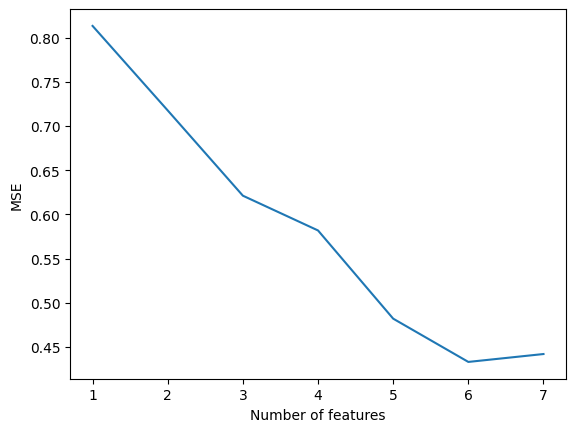

In [19]:
import matplotlib.pyplot as plt
plt.plot(tune_select_scale_knn.cv_results_['param_select__k'].data, -tune_select_scale_knn.cv_results_['mean_test_score'])
plt.ylabel('MSE')
plt.xlabel('Number of features')
plt.show()

But the important result is the evaluation of the model on test

In [26]:
from sklearn.metrics import mean_squared_error

predictions_test = tune_select_scale_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions_test))

0.6657180265114533